In [1]:
## Import basic Libraries ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from collections import Counter

In [3]:
## Import Machine Learing Libraries ##
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,learning_curve


In [4]:
sns.set(style='white',context='notebook',palette='deep')

In [5]:
## Loading the titanic data ##
train = pd.read_csv("C:/Users/sutiwari/Downloads/Titanic_Data_Set/train.csv")
test = pd.read_csv("C:/Users/sutiwari/Downloads/Titanic_Data_Set/test.csv")
IDtest = test["PassengerId"]

In [6]:
IDtest.describe()

count     418.000000
mean     1100.500000
std       120.810458
min       892.000000
25%       996.250000
50%      1100.500000
75%      1204.750000
max      1309.000000
Name: PassengerId, dtype: float64

In [7]:
IDtest.count()

418

In [8]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Andersson, Miss. Sigrid Elisabeth",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
## Outlier Detection ##
# used extend instead of append because it will add the list's elements not the whole list.

def detect_outliers(df,n,features):
    """Takes a dataframe df of features and return a list of the indices corresponding to the observations 
    containing more than n outliers according to the Turkey method"""
    outlier_indices = []
    # iterate over feature(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3-Q1
        # outiler step 
        outlier_step = 1.5*IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col]< Q1 - outlier_step)|(df[col] > Q3 + outlier_step)].index
        
        #Append the found outlier indices for col to the List of outliers indices 
        # used extend instead of append because it will add the list's elements not the whole list.
        outlier_indices.extend(outlier_list_col)
        
        # select observations containing more than 2 outliers 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v > n)
        
    return multiple_outliers
    
    
        

In [10]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [11]:
# detect outliers from Age, sibSp ,parch and fare
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])

C:\Users\sutiwari\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [12]:
type(Outliers_to_drop)

list

In [13]:
train.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [14]:
len(Outliers_to_drop)

10

In [15]:
# Drop outliers 
train = train.drop(Outliers_to_drop,axis=0).reset_index(drop=True)

In [16]:
train.shape

(881, 12)

In [17]:
# join train and test datasets in order to obtain the same number of features during categorical conversion
train_len = len(train)

In [18]:
dataset = pd.concat(objs=[train,test],axis=0).reset_index(drop=True)

In [19]:
dataset.Survived.isnull().count()

1299

In [20]:
dataset = dataset.fillna(np.nan)
dataset.isnull().sum()

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [21]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null object
Age            711 non-null float64
SibSp          881 non-null int64
Parch          881 non-null int64
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          201 non-null object
Embarked       879 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


In [24]:
train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
877,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
879,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
880,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [25]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [27]:
##### Feature analysis #####
    ### Numerical Values ###

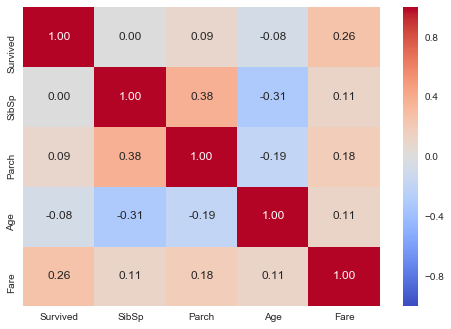

In [28]:
### Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True,fmt=".2f",cmap="coolwarm")


In [29]:
"""Only Fare feature seems to have a significative correlation with the survival probability.

It doesn't mean that the other features are not usefull. Subpopulations in these features can be correlated with the survival. To determine this, we need to explore in detail these features"""

"Only Fare feature seems to have a significative correlation with the survival probability.\n\nIt doesn't mean that the other features are not usefull. Subpopulations in these features can be correlated with the survival. To determine this, we need to explore in detail these features"

In [30]:
### Uni-Variate analysis ###

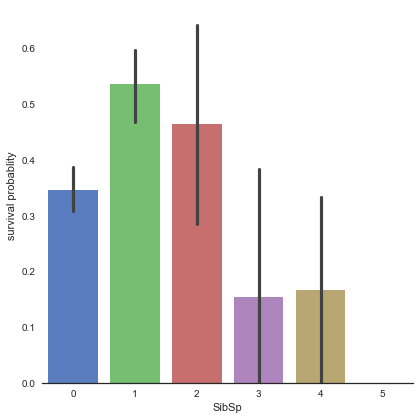

In [31]:
##### SibSp #####
g = sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar",size=6,palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probablity")

In [32]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [33]:
train.SibSp.describe()

count    881.000000
mean       0.455165
std        0.871571
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: SibSp, dtype: float64

In [34]:
## It seems that passengers having a lot of siblings/spouses have less chance to survive

## Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive

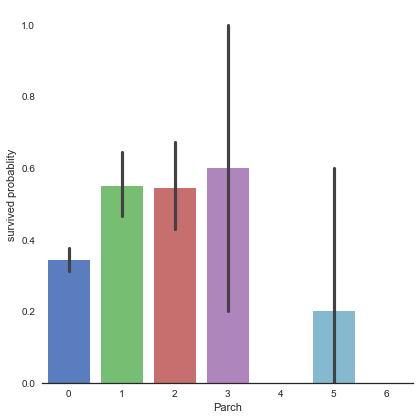

In [35]:
#### Parch ####
g =  sns.factorplot(x="Parch",y="Survived",data=train,kind="bar",size=6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survived probablity")

In [36]:
train.Parch.describe()

count    881.000000
mean       0.363224
std        0.791839
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [37]:
"""Small families have more chance to survive, more than single (Parch 0), medium (Parch 3,4) and large families (Parch 5,6 ).

    There is an important standard deviation in the survival of passengers with 3 parents/children"""

'Small families have more chance to survive, more than single (Parch 0), medium (Parch 3,4) and large families (Parch 5,6 ).\n\n    There is an important standard deviation in the survival of passengers with 3 parents/children'

C:\Users\sutiwari\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


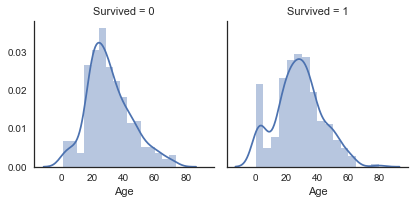

In [38]:
#### Age ####
g = sns.FacetGrid(train,col='Survived')
g = g.map(sns.distplot,"Age")

In [39]:
"""Age distribution seems to be a tailed distribution, maybe a gaussian distribution.

We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived.

So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

It seems that very young passengers have more chance to survive."""

'Age distribution seems to be a tailed distribution, maybe a gaussian distribution.\n\nWe notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived.\n\nSo, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.\n\nIt seems that very young passengers have more chance to survive.'

C:\Users\sutiwari\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\sutiwari\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\sutiwari\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


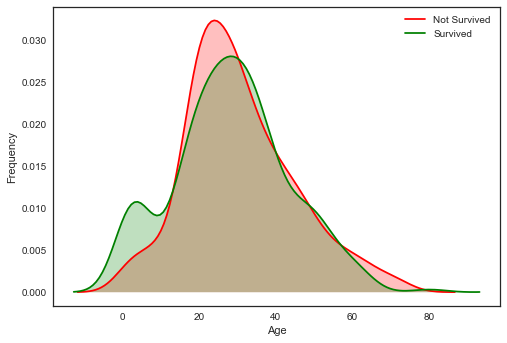

In [40]:
g = sns.kdeplot(train["Age"][(train["Survived"]==0)&(train["Age"].notnull())],color="Red",shade=True)
g = sns.kdeplot(train["Age"][(train["Survived"]==1&(train["Age"].notnull()))],color="Green",shade=True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g=g.legend(["Not Survived","Survived"])

In [41]:
"""When we superimpose the two densities , we cleary see a peak correponsing (between 0 and 5) to babies and very young childrens."""

'When we superimpose the two densities , we cleary see a peak correponsing (between 0 and 5) to babies and very young childrens.'

In [42]:
dataset["Fare"].isnull().sum()

1

In [43]:
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

C:\Users\sutiwari\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


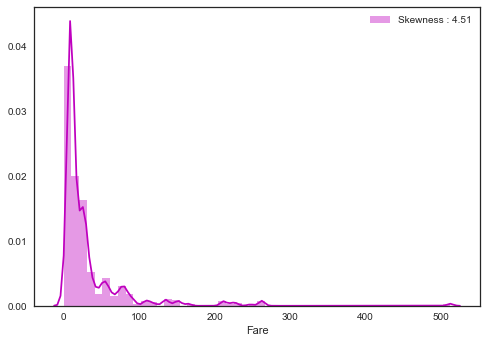

In [44]:
g = sns.distplot(dataset["Fare"],color="m",label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

In [45]:
"""As you can see here the Fare column is highly skewed.This can lead to overweight very high values in the model, even if it is scaled"""

'As you can see here the Fare column is highly skewed.This can lead to overweight very high values in the model, even if it is scaled'

In [46]:
# So to solve this better to transform it with the log function to reduce this skew

In [47]:
# Apply log to Fare to reduce skewness distribution
dataset["Fare"] = dataset["Fare"].map(lambda i:np.log(i) if i>0 else 0)

C:\Users\sutiwari\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


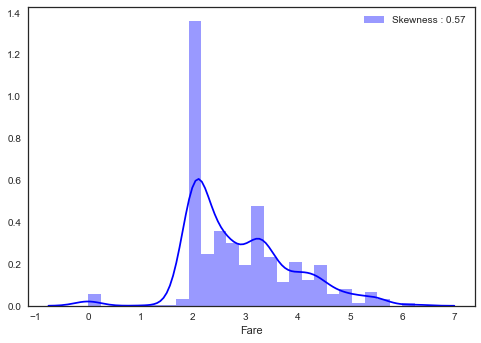

In [48]:
g = sns.distplot(dataset["Fare"],color="b",label="Skewness : %.2f"%(dataset["Fare"].skew()))
g =g.legend(loc="best")

In [49]:
## Skewness decreased after log transformation

In [50]:
###### Categorical Variables ######

In [51]:
## Sex ##

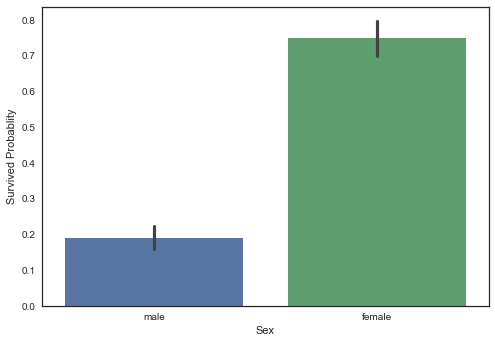

In [52]:
g = sns.barplot(x="Sex",y="Survived",data=train)
g = g.set_ylabel("Survived Probablity")

In [53]:
train[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


In [54]:
"""It is clearly obvious that Male have less chance to survive than Female.

So Sex, might play an important role in the prediction of the survival.

For those who have seen the Titanic movie (1997), I am sure, we all remember this sentence during the evacuation : "Women and children first"."""

'It is clearly obvious that Male have less chance to survive than Female.\n\nSo Sex, might play an important role in the prediction of the survival.\n\nFor those who have seen the Titanic movie (1997), I am sure, we all remember this sentence during the evacuation : "Women and children first".'

In [55]:
## Pclass ##

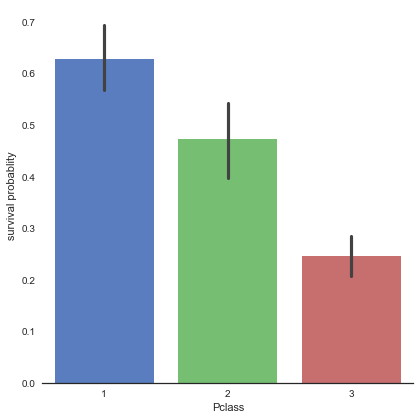

In [56]:
g = sns.factorplot(x="Pclass",y="Survived",data=train,kind="bar",size=6,palette="muted")
g.despine(left = True)
g = g.set_ylabels("survival probablity")

In [57]:
## Exploring Pclass vs Surived by Sex ##

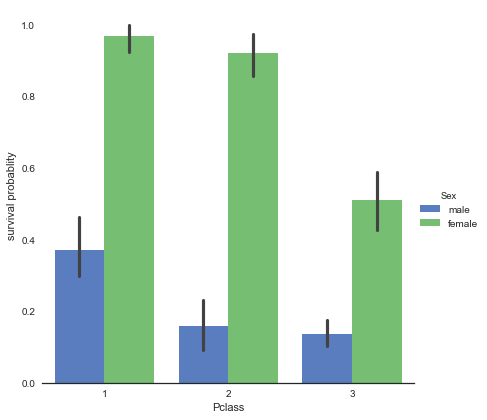

In [58]:
g = sns.factorplot(x="Pclass",y="Survived",hue="Sex",data=train,size=6,kind="bar",palette="muted")
g.despine(left=True)
g=g.set_ylabels("survival probablity")

In [59]:
"""The passenger survival is not the same in the 3 classes. First class passengers have more chance to survive than second class and third class passengers.

This trend is conserved when we look at both male and female passengers."""

'The passenger survival is not the same in the 3 classes. First class passengers have more chance to survive than second class and third class passengers.\n\nThis trend is conserved when we look at both male and female passengers.'

In [60]:
## Embarked ##
dataset["Embarked"].describe()

count     1297
unique       3
top          S
freq       904
Name: Embarked, dtype: object

In [61]:
# Fill Embarked nan values of dataset set with 'S' most frequent value
# Since we have two missing values lets fill with the mode 
dataset["Embarked"] =  dataset["Embarked"].fillna("S")


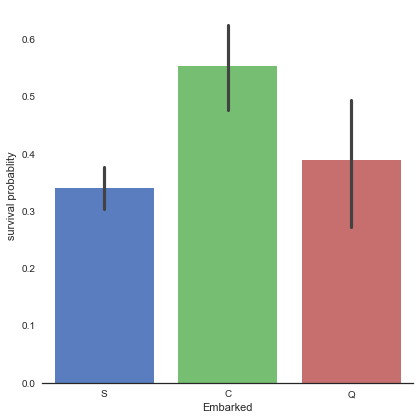

In [62]:
g = sns.factorplot(x="Embarked",y="Survived",data=train,size=6,kind="bar",palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probablity")

In [63]:
"""It seems that passenger coming from Cherbourg (C) have more chance to survive.

My hypothesis is that the proportion of first class passengers is higher for those who came from Cherbourg than Queenstown (Q), Southampton (S)."""

'It seems that passenger coming from Cherbourg (C) have more chance to survive.\n\nMy hypothesis is that the proportion of first class passengers is higher for those who came from Cherbourg than Queenstown (Q), Southampton (S).'

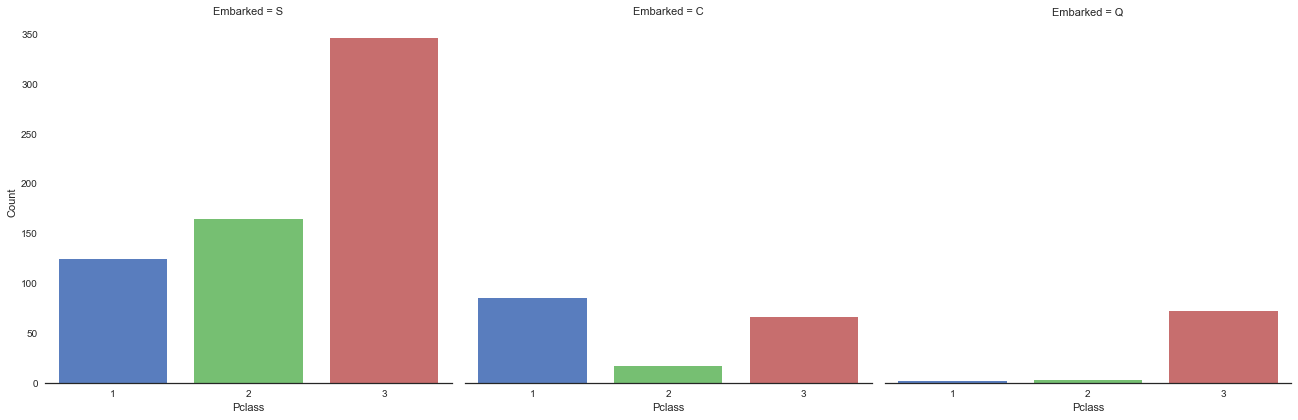

In [65]:
g = sns.factorplot("Pclass",col="Embarked",data=train,size=6,kind="count",palette="muted")
g.despine(left=True)
g=g.set_ylabels("Count")

In [66]:
"""Indeed, the third class is the most frequent for passenger coming from Southampton (S) and Queenstown (Q), whereas Cherbourg passengers are mostly in first class which have the highest survival rate.

At this point, i can't explain why first class has an higher survival rate. My hypothesis is that first class passengers were prioritised during the evacuation due to their influence."""

"Indeed, the third class is the most frequent for passenger coming from Southampton (S) and Queenstown (Q), whereas Cherbourg passengers are mostly in first class which have the highest survival rate.\n\nAt this point, i can't explain why first class has an higher survival rate. My hypothesis is that first class passengers were prioritised during the evacuation due to their influence."

In [67]:
####### Filling Missing Value #######

In [68]:
### Age ###
"""As we see, Age column contains 256 missing values in the whole dataset.

Since there is subpopulations that have more chance to survive (children for example), it is preferable to keep the age feature and to impute the missing values.

To adress this problem, i looked at the most correlated features with Age (Sex, Parch , Pclass and SibSP)."""

'As we see, Age column contains 256 missing values in the whole dataset.\n\nSince there is subpopulations that have more chance to survive (children for example), it is preferable to keep the age feature and to impute the missing values.\n\nTo adress this problem, i looked at the most correlated features with Age (Sex, Parch , Pclass and SibSP).'

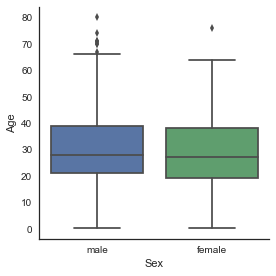

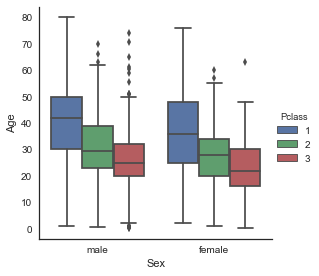

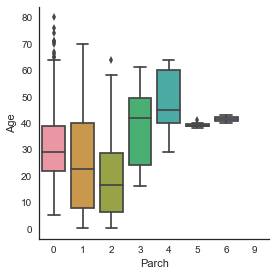

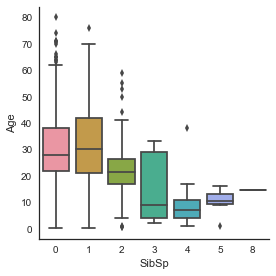

In [70]:
# Explore Age vs Sex,Parch,PClass and SibSp #

g= sns.factorplot(y="Age",x="Sex",data=dataset,kind="box")
g=sns.factorplot(y="Age",x="Sex",hue="Pclass",data=dataset,kind="box")
g=sns.factorplot(y="Age",x="Parch",data=dataset,kind="box")
g=sns.factorplot(y="Age",x="SibSp",data=dataset,kind="box")

In [71]:
"""Age distribution seems to be the same in Male and Female subpopulations, so Sex is not informative to predict Age.

However, 1rst class passengers are older than 2nd class passengers who are also older than 3rd class passengers.

Moreover, the more a passenger has parents/children the older he is and the more a passenger has siblings/spouses the younger he is."""

'Age distribution seems to be the same in Male and Female subpopulations, so Sex is not informative to predict Age.\n\nHowever, 1rst class passengers are older than 2nd class passengers who are also older than 3rd class passengers.\n\nMoreover, the more a passenger has parents/children the older he is and the more a passenger has siblings/spouses the younger he is.'

In [72]:
# Convert Sex into categorical value 0 for male and 1 for female
dataset["Sex"] = dataset["Sex"].map({"male":0,"female":1})

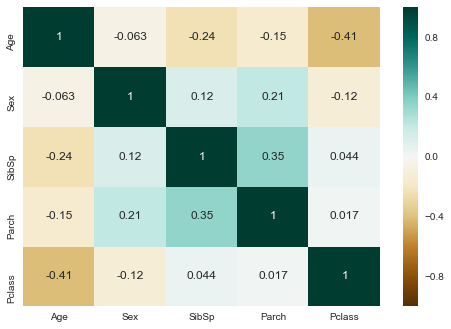

In [73]:
g=sns.heatmap(dataset[["Age","Sex","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)

In [74]:
"""The correlation map confirms the factorplots observations except for Parch. Age is not correlated with Sex, but is negatively correlated with Pclass, Parch and SibSp.

In the plot of Age in function of Parch, Age is growing with the number of parents / children. But the general correlation is negative.

So, i decided to use SibSP, Parch and Pclass in order to impute the missing ages.

The strategy is to fill Age with the median age of similar rows according to Pclass, Parch and SibSp."""

'The correlation map confirms the factorplots observations except for Parch. Age is not correlated with Sex, but is negatively correlated with Pclass, Parch and SibSp.\n\nIn the plot of Age in function of Parch, Age is growing with the number of parents / children. But the general correlation is negative.\n\nSo, i decided to use SibSP, Parch and Pclass in order to impute the missing ages.\n\nThe strategy is to fill Age with the median age of similar rows according to Pclass, Parch and SibSp.'

In [85]:
### Filling missing Values ###
    ## Fill Age with the median age of similar rows according to Pclass,Parch and SibSp
         #index of NaN age row
index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)
for i in index_NaN_age:
            age_med = dataset["Age"].median()
            age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass']==dataset.iloc[i]["Pclass"]))].median()
            if not np.isnan(age_pred) :
                dataset['Age'].iloc[i] = age_pred
            else :
                dataset['Age'].iloc[i] = age_med
                    

C:\Users\sutiwari\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [86]:
index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)
index_NaN_age

[]

In [87]:
dataset.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,1.981001,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171
1,38.0,C85,C,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599
2,26.0,NaN,S,2.070022,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282
3,35.0,C123,S,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803
4,35.0,NaN,S,2.085672,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450
5,25.0,NaN,Q,2.135148,"Moran, Mr. James",0,6,3,0,0,0.0,330877
6,54.0,E46,S,3.948596,"McCarthy, Mr. Timothy J",0,7,1,0,0,0.0,17463
7,2.0,NaN,S,3.048088,"Palsson, Master. Gosta Leonard",1,8,3,0,3,0.0,349909
8,27.0,NaN,S,2.409941,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,1,0,1.0,347742
9,14.0,NaN,C,3.403555,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1,1.0,237736


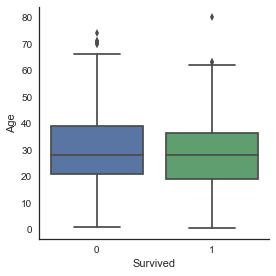

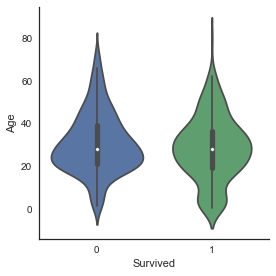

In [88]:
g = sns.factorplot(x="Survived",y="Age",data=train,kind="box")
g = sns.factorplot(x="Survived",y="Age",data=train,kind="violin")

In [89]:
"""No difference between median value of age in survived and not survived subpopulation.

But in the violin plot of survived passengers, we still notice that very young passengers have higher survival rate."""

'No difference between median value of age in survived and not survived subpopulation.\n\nBut in the violin plot of survived passengers, we still notice that very young passengers have higher survival rate.'

In [90]:
###### Feature Engineering ######

In [92]:
## Name/Title ##
dataset.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [93]:
"""The Name feature contains information on passenger's title.

Since some passenger with distingused title may be preferred during the evacuation, it is interesting to add them to the model."""

"The Name feature contains information on passenger's title.\n\nSince some passenger with distingused title may be preferred during the evacuation, it is interesting to add them to the model."

In [114]:
## Get Title from Name ##
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
dataset["Title"] = pd.Series(dataset_title)
dataset["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [119]:
dataset.Title.isnull().sum()

0

In [121]:
dataset["Title"].isnull().sum()

0

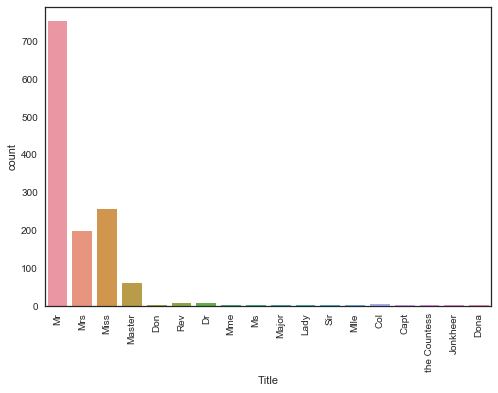

In [116]:
g = sns.countplot(x="Title",data=dataset)
g = plt.setp(g.get_xticklabels(),rotation=90)

In [107]:
"""There is 17 titles in the dataset, most of them are very rare and we can group them in 4 categories"""

'There is 17 titles in the dataset, most of them are very rare and we can group them in 4 categories'

In [112]:
dataset.Name.isnull().sum()

0

In [122]:
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})

In [123]:
dataset["Title"] = dataset["Title"].astype(int)

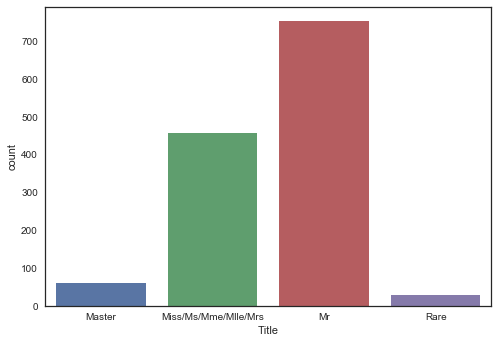

In [124]:
g = sns.countplot(dataset['Title'])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

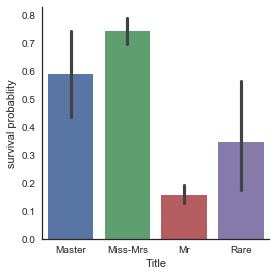

In [125]:
g = sns.factorplot(x="Title",y="Survived",data=dataset,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probablity")

In [126]:
""""Women and children first"

It is interesting to note that passengers with rare title have more chance to survive."""

'"Women and children first"\n\nIt is interesting to note that passengers with rare title have more chance to survive.'

In [127]:
## drop name variable ##
dataset.drop(labels=["Name"],axis=1,inplace=True)

In [128]:
"""5.2 Family size¶
We can imagine that large families will have more difficulties to evacuate, looking for theirs sisters/brothers/parents during the evacuation. So, i choosed to create a "Fize" (family size) feature which is the sum of SibSp , Parch and 1 (including the passenger)."""

'5.2 Family size¶\nWe can imagine that large families will have more difficulties to evacuate, looking for theirs sisters/brothers/parents during the evacuation. So, i choosed to create a "Fize" (family size) feature which is the sum of SibSp , Parch and 1 (including the passenger).'

In [129]:
### Family Size ###

In [130]:
dataset["Fsize"] = dataset["SibSp"]+dataset["Parch"]+1

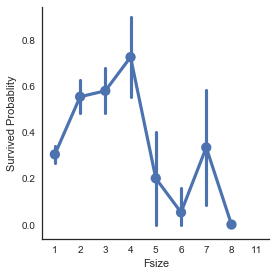

In [132]:
g = sns.factorplot(x="Fsize",y="Survived",data=dataset)
g = g.set_ylabels("Survived Probablity")

In [133]:
"""The family size seems to play an important role, survival probability is worst for large families.

Additionally, i decided to created 4 categories of family size."""

'The family size seems to play an important role, survival probability is worst for large families.\n\nAdditionally, i decided to created 4 categories of family size.'

In [134]:
## Creating new Feature of Family size ##
dataset['Single'] = dataset['Fsize'].map(lambda s:  1 if s == 1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s : 1 if s == 2 else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if s >= 5 else 0)

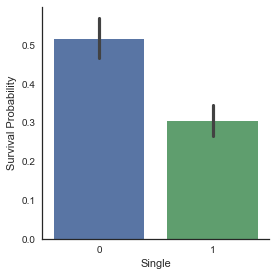

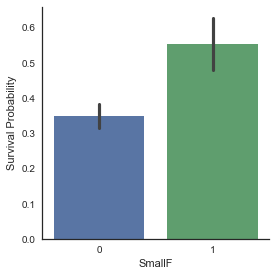

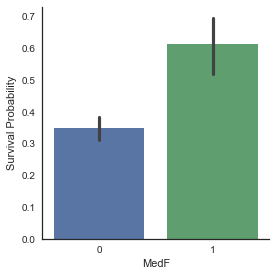

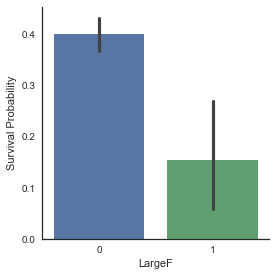

In [135]:
g = sns.factorplot(x="Single",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="SmallF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="MedF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="LargeF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")

In [136]:
"""Factorplots of family size categories show that Small and Medium families have more chance to survive than single passenger and large families."""

'Factorplots of family size categories show that Small and Medium families have more chance to survive than single passenger and large families.'

In [137]:
# convert to indicator values Title and Embarked
dataset = pd.get_dummies(dataset,columns=["Title"])
dataset = pd.get_dummies(dataset,columns=["Embarked"],prefix="Em")

In [140]:
dataset.head()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,...,SmallF,MedF,LargeF,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,22.0,NaN,1.981001,0,1,3,0,1,0.0,A/5 21171,...,1,0,0,0,0,1,0,0,0,1
1,38.0,C85,4.266662,0,2,1,1,1,1.0,PC 17599,...,1,0,0,0,1,0,0,1,0,0
2,26.0,NaN,2.070022,0,3,3,1,0,1.0,STON/O2. 3101282,...,0,0,0,0,1,0,0,0,0,1
3,35.0,C123,3.972177,0,4,1,1,1,1.0,113803,...,1,0,0,0,1,0,0,0,0,1
4,35.0,NaN,2.085672,0,5,3,0,0,0.0,373450,...,0,0,0,0,0,1,0,0,0,1


In [141]:
##### Cabin #####

In [142]:
dataset["Cabin"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [143]:
dataset["Cabin"].describe()

count     292
unique    186
top        G6
freq        5
Name: Cabin, dtype: object

In [144]:
dataset["Cabin"].isnull().sum()

1007

In [145]:
dataset["Cabin"][dataset["Cabin"].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [146]:
# Replace the Cabin number by the type of the cabin 'X' if not
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin']])

In [147]:
"""The first letter of the cabin indicates the Desk, i choosed to keep this information only, since it indicates the probable location of the passenger in the Titanic."""

'The first letter of the cabin indicates the Desk, i choosed to keep this information only, since it indicates the probable location of the passenger in the Titanic.'

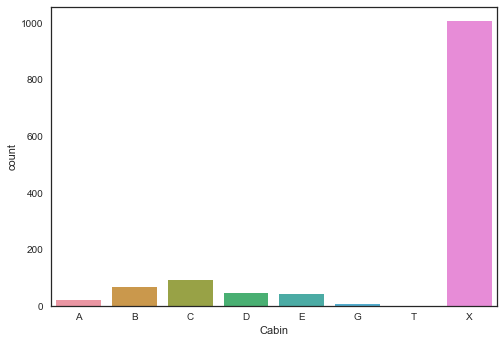

In [148]:
g = sns.countplot(dataset["Cabin"],order=['A','B','C','D','E','G','T','X'])

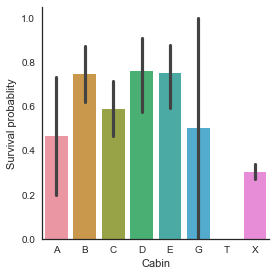

In [149]:
g = sns.factorplot(y="Survived",x="Cabin",data=dataset,kind="bar",order=['A','B','C','D','E','G','T','X'])
g = g.set_ylabels("Survival probablity")

In [150]:
"""Because of the low number of passenger that have a cabin, survival probabilities have an important standard deviation and we can't distinguish between survival probability of passengers in the different desks.

But we can see that passengers with a cabin have generally more chance to survive than passengers without (X).

It is particularly true for cabin B, C, D, E and F."""

"Because of the low number of passenger that have a cabin, survival probabilities have an important standard deviation and we can't distinguish between survival probability of passengers in the different desks.\n\nBut we can see that passengers with a cabin have generally more chance to survive than passengers without (X).\n\nIt is particularly true for cabin B, C, D, E and F."

In [151]:
dataset = pd.get_dummies(dataset, columns = ["Cabin"],prefix="Cabin")

In [152]:
##### Ticket #####

In [153]:
dataset["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [154]:
"""It could mean that tickets sharing the same prefixes could be booked for cabins placed together. It could therefore lead to the actual placement of the cabins within the ship.

Tickets with same prefixes may have a similar class and survival.

So i decided to replace the Ticket feature column by the ticket prefixe. Which may be more informative."""

'It could mean that tickets sharing the same prefixes could be booked for cabins placed together. It could therefore lead to the actual placement of the cabins within the ship.\n\nTickets with same prefixes may have a similar class and survival.\n\nSo i decided to replace the Ticket feature column by the ticket prefixe. Which may be more informative.'

In [156]:
## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 

Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit():
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0])
    else:
        Ticket.append("X")
        
        
dataset["Ticket"] = Ticket
dataset["Ticket"].head()

    


0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [157]:
dataset = pd.get_dummies(dataset,columns=["Ticket"],prefix="T")

In [158]:
# Create categorical values for Pclass
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset=pd.get_dummies(dataset,columns=["Pclass"],prefix="Pc")

In [159]:
# Drop useless variables 
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [160]:
dataset.head()


,Age,Fare,Parch,Sex,SibSp,Survived,Fsize,Single,SmallF,MedF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,22.0,1.981001,0,0,1,0.0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,4.266662,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,26.0,2.070022,0,1,0,1.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,35.0,3.972177,0,1,1,1.0,2,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,35.0,2.085672,0,0,0,0.0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [161]:
################# Modeling #################


In [162]:
train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

C:\Users\sutiwari\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [164]:
dataset.Survived.unique()


array([  0.,   1.,  nan])

In [165]:
## Separate train features and label 

train["Survived"] = train["Survived"].astype(int)

Y_train = train["Survived"]

X_train = train.drop(labels = ["Survived"],axis = 1)

C:\Users\sutiwari\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


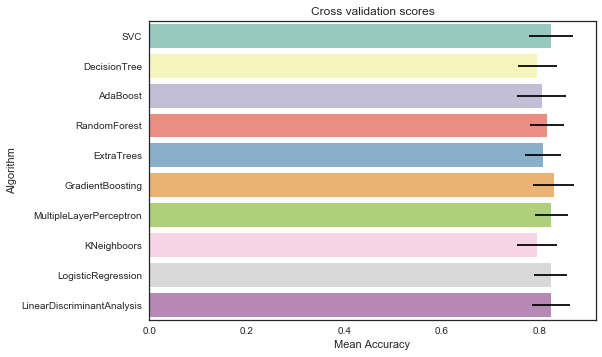

In [166]:
###### Simple modeling ######
##### Cross Validation models #####
# cross validation model with Kfold stratified cross val #
kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms
random_state = 2 
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())


cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X_train,y=Y_train,scoring="accuracy",cv=kfold,n_jobs=4))

cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


In [167]:
## I decided to choose the SVC, AdaBoost, RandomForest , ExtraTrees and the GradientBoosting classifiers for the ensemble modeling. ##

In [168]:
###### Hyperparameter tunning for best models ######

In [169]:
"""I performed a grid search optimization for AdaBoost, ExtraTrees , RandomForest, GradientBoosting and SVC classifiers.

I set the "n_jobs" parameter to 4 since i have 4 cpu . The computation time is clearly reduced.

But be carefull, this step can take a long time, i took me 15 min in total on 4 cpu."""

'I performed a grid search optimization for AdaBoost, ExtraTrees , RandomForest, GradientBoosting and SVC classifiers.\n\nI set the "n_jobs" parameter to 4 since i have 4 cpu . The computation time is clearly reduced.\n\nBut be carefull, this step can take a long time, i took me 15 min in total on 4 cpu.'

In [171]:
### meta modeling with ADBoost,RF extratrees and gradientboosting ###
## Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done  47 tasks      | elapsed:   14.1s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   22.2s finished


In [172]:
gsadaDTC.best_score_

0.82406356413166859

In [175]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   56.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.4min finished


0.82973893303064694

In [176]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   26.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   54.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.3min finished


0.83427922814982969

In [177]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   30.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   51.8s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  1.2min finished


0.83200908059023837

In [178]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   21.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   47.5s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:  1.2min finished


0.83314415437003408

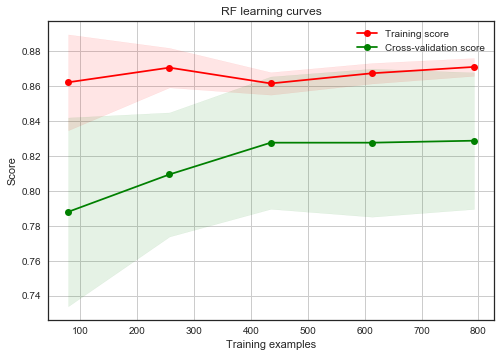

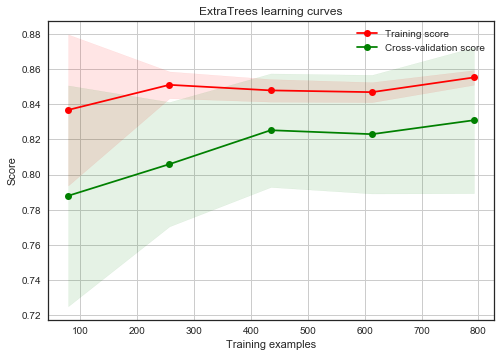

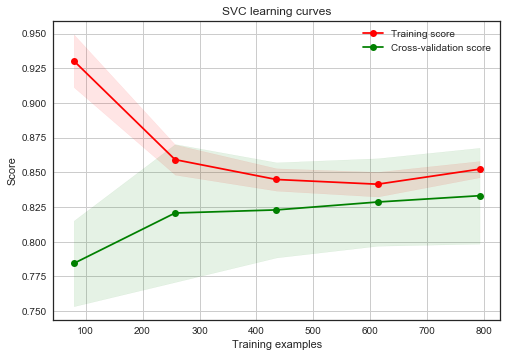

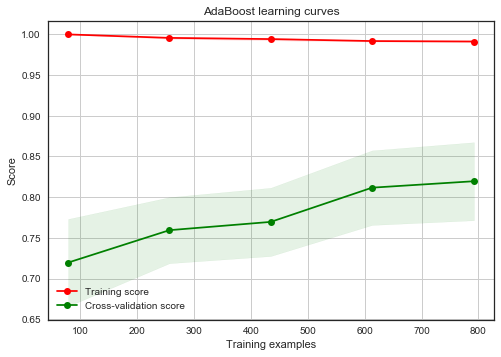

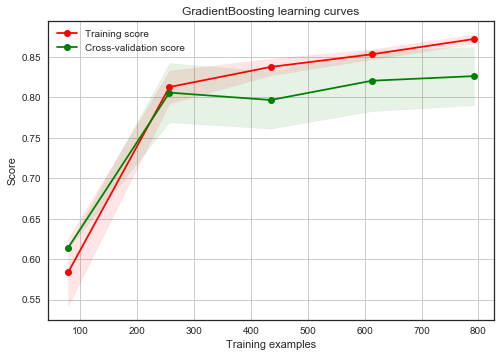

In [180]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

In [181]:
"""GradientBoosting and Adaboost classifiers tend to overfit the training set. According to the growing cross-validation curves GradientBoosting and Adaboost could perform better with more training examples.

SVC and ExtraTrees classifiers seem to better generalize the prediction since the training and cross-validation curves are close together."""

'GradientBoosting and Adaboost classifiers tend to overfit the training set. According to the growing cross-validation curves GradientBoosting and Adaboost could perform better with more training examples.\n\nSVC and ExtraTrees classifiers seem to better generalize the prediction since the training and cross-validation curves are close together.'

In [182]:
"""Feature importance of tree based classifiers
In order to see the most informative features for the prediction of passengers survival, i displayed the feature importance for the 4 tree based classifiers."""

'Feature importance of tree based classifiers\nIn order to see the most informative features for the prediction of passengers survival, i displayed the feature importance for the 4 tree based classifiers.'

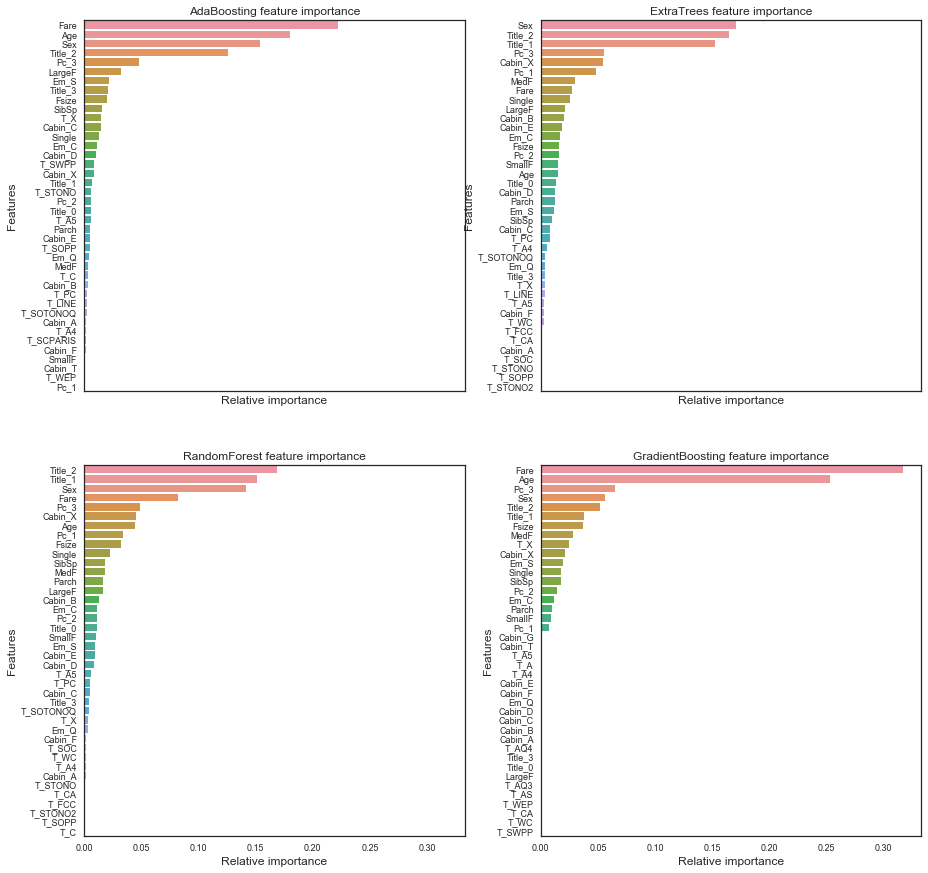

In [183]:
##### Feature importance ######
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [184]:
"""I plot the feature importance for the 4 tree based classifiers (Adaboost, ExtraTrees, RandomForest and GradientBoosting).

We note that the four classifiers have different top features according to the relative importance. It means that their predictions are not based on the same features. Nevertheless, they share some common important features for the classification , for example 'Fare', 'Title_2', 'Age' and 'Sex'.

Title_2 which indicates the Mrs/Mlle/Mme/Miss/Ms category is highly correlated with Sex.

We can say that:

Pc_1, Pc_2, Pc_3 and Fare refer to the general social standing of passengers.

Sex and Title_2 (Mrs/Mlle/Mme/Miss/Ms) and Title_3 (Mr) refer to the gender.

Age and Title_1 (Master) refer to the age of passengers.

Fsize, LargeF, MedF, Single refer to the size of the passenger family.

According to the feature importance of this 4 classifiers, the prediction of the survival seems to be more associated with the Age, the Sex, the family size and the social standing of the passengers more than the location in the boat."""

"I plot the feature importance for the 4 tree based classifiers (Adaboost, ExtraTrees, RandomForest and GradientBoosting).\n\nWe note that the four classifiers have different top features according to the relative importance. It means that their predictions are not based on the same features. Nevertheless, they share some common important features for the classification , for example 'Fare', 'Title_2', 'Age' and 'Sex'.\n\nTitle_2 which indicates the Mrs/Mlle/Mme/Miss/Ms category is highly correlated with Sex.\n\nWe can say that:\n\nPc_1, Pc_2, Pc_3 and Fare refer to the general social standing of passengers.\n\nSex and Title_2 (Mrs/Mlle/Mme/Miss/Ms) and Title_3 (Mr) refer to the gender.\n\nAge and Title_1 (Master) refer to the age of passengers.\n\nFsize, LargeF, MedF, Single refer to the size of the passenger family.\n\nAccording to the feature importance of this 4 classifiers, the prediction of the survival seems to be more associated with the Age, the Sex, the family size and the so

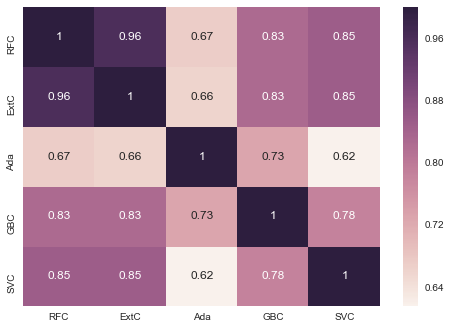

In [185]:
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

In [186]:
"""The prediction seems to be quite similar for the 5 classifiers except when Adaboost is compared to the others classifiers.

The 5 classifiers give more or less the same prediction but there is some differences. Theses differences between the 5 classifier predictions are sufficient to consider an ensembling vote."""

'The prediction seems to be quite similar for the 5 classifiers except when Adaboost is compared to the others classifiers.\n\nThe 5 classifiers give more or less the same prediction but there is some differences. Theses differences between the 5 classifier predictions are sufficient to consider an ensembling vote.'

In [187]:
#### Ensemble modeling #### 

In [188]:
"""Combining models¶
I choosed a voting classifier to combine the predictions coming from the 5 classifiers.

I preferred to pass the argument "soft" to the voting parameter to take into account the probability of each vote."""

'Combining models¶\nI choosed a voting classifier to combine the predictions coming from the 5 classifiers.\n\nI preferred to pass the argument "soft" to the voting parameter to take into account the probability of each vote.'

In [189]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

In [190]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("ensemble_python_voting.csv",index=False)

In [ ]:
###### End to Titanic ######